load Data

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# ngeLoad dataset MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


menampilkan 100 gambar

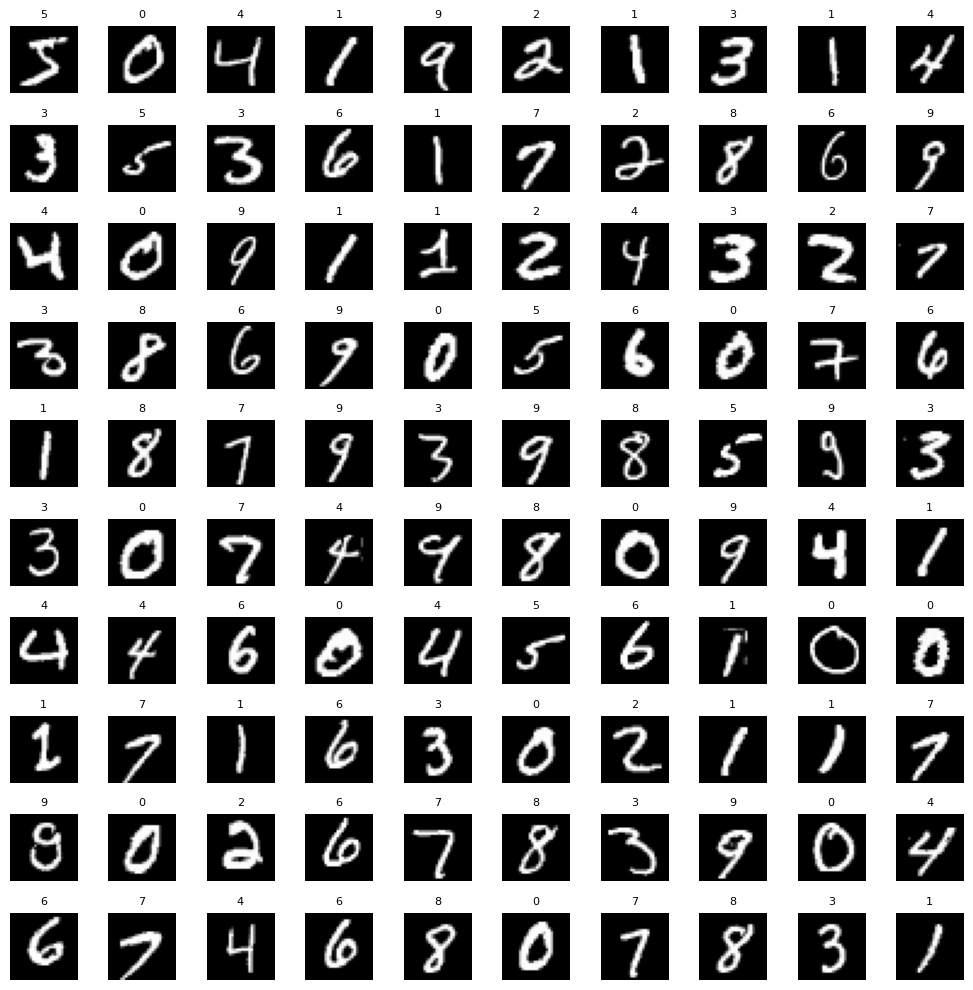

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# menampilkan 100 gambar pertama (10x10 grid)
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i], fontsize=8)
plt.tight_layout()
plt.show()



menambahkan Dimensi channel

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)



maxpooling

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. Load dataset MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

# 2. Bangun model CNN dengan MaxPooling
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),   # <-- MaxPooling diterapkan di sini
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),   # <-- MaxPooling lagi
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Latih model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

# 5. Evaluasi
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Akurasi test:", test_acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 27ms/step - accuracy: 0.8973 - loss: 0.3346 - val_accuracy: 0.9833 - val_loss: 0.0523
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9855 - loss: 0.0464 - val_accuracy: 0.9885 - val_loss: 0.0371
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9904 - loss: 0.0306 - val_accuracy: 0.9871 - val_loss: 0.0399
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9926 - loss: 0.0241 - val_accuracy: 0.9908 - val_loss: 0.0309
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9909 - val_loss: 0.0272
313/313 - 3s - 10ms/step - accuracy: 0.9909 - loss: 0.0272
Akurasi test: 0.9908999800682068


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


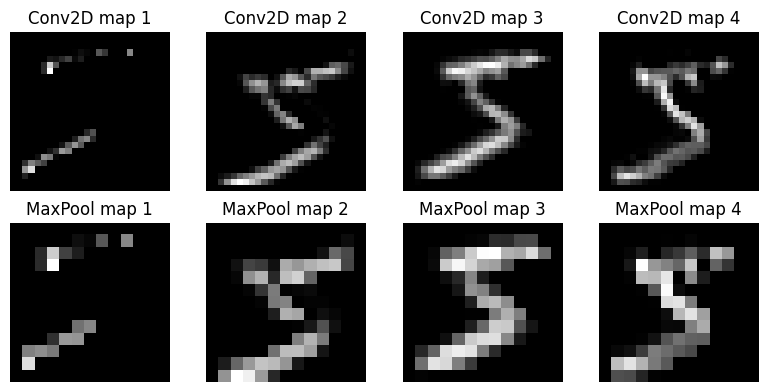

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# 1. Load dataset MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # tambah channel grayscale

# 2. Ambil satu gambar digit
sample = x_train[0:1]

# 3. Functional API: Conv2D + MaxPooling
inputs = layers.Input(shape=(28,28,1))
conv = layers.Conv2D(4, (3,3), activation='relu')(inputs)
pool = layers.MaxPooling2D((2,2))(conv)

conv_model = models.Model(inputs=inputs, outputs=conv)
pool_model = models.Model(inputs=inputs, outputs=pool)

# 4. Jalankan model
conv_output = conv_model.predict(sample)
pool_output = pool_model.predict(sample)

# 5. Visualisasi hasil
fig, axes = plt.subplots(2, 4, figsize=(8,4))

for i in range(4):
    axes[0,i].imshow(conv_output[0,:,:,i], cmap='gray')
    axes[0,i].set_title(f"Conv2D map {i+1}")
    axes[0,i].axis('off')

    axes[1,i].imshow(pool_output[0,:,:,i], cmap='gray')
    axes[1,i].set_title(f"MaxPool map {i+1}")
    axes[1,i].axis('off')

plt.tight_layout()
plt.show()



model CNN

In [ ]:
# memakai Model CNN sederhana
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


hasil

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9025 - loss: 0.3352 - val_accuracy: 0.9769 - val_loss: 0.0672
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9821 - loss: 0.0585 - val_accuracy: 0.9819 - val_loss: 0.0528
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9876 - loss: 0.0395 - val_accuracy: 0.9851 - val_loss: 0.0411
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9918 - loss: 0.0260 - val_accuracy: 0.9863 - val_loss: 0.0416
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9949 - loss: 0.0170 - val_accuracy: 0.9868 - val_loss: 0.0394


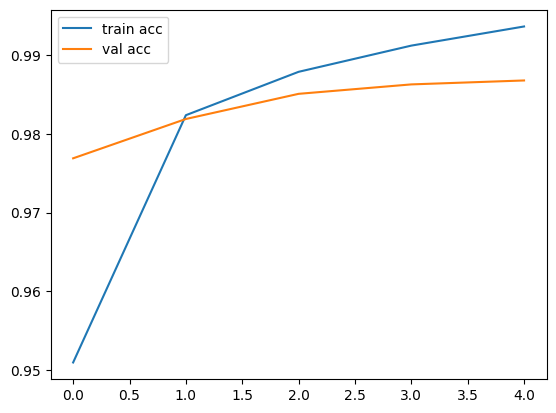

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot hasil
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


evaluasi model di data uji

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 2s - 6ms/step - accuracy: 0.7266 - loss: 325.4374
Test accuracy: 0.7265999913215637


Prediksi contoh gambar

In [ ]:
import numpy as np

# Ambil 5 gambar dari test set
for i in range(5):
    img = x_test[i].reshape(1,28,28,1)
    prediction = model.predict(img)
    print("Label asli:", y_test[i], "→ Prediksi:", np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Label asli: 7 → Prediksi: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Label asli: 2 → Prediksi: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Label asli: 1 → Prediksi: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Label asli: 0 → Prediksi: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Label asli: 4 → Prediksi: 4


visualisasi prediksi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


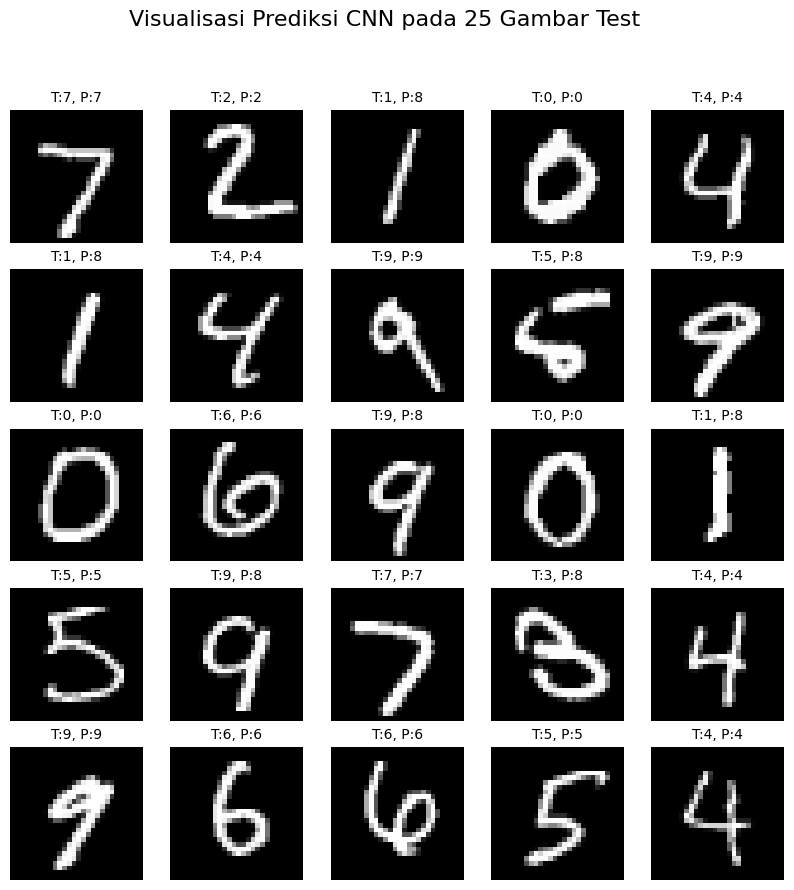

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
for i in range(25):
    img = x_test[i].reshape(1,28,28,1)
    pred = np.argmax(model.predict(img))
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"T:{y_test[i]}, P:{pred}", fontsize=10)
    plt.axis('off')
plt.suptitle("Visualisasi Prediksi CNN pada 25 Gambar Test", fontsize=16)
plt.show()


confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


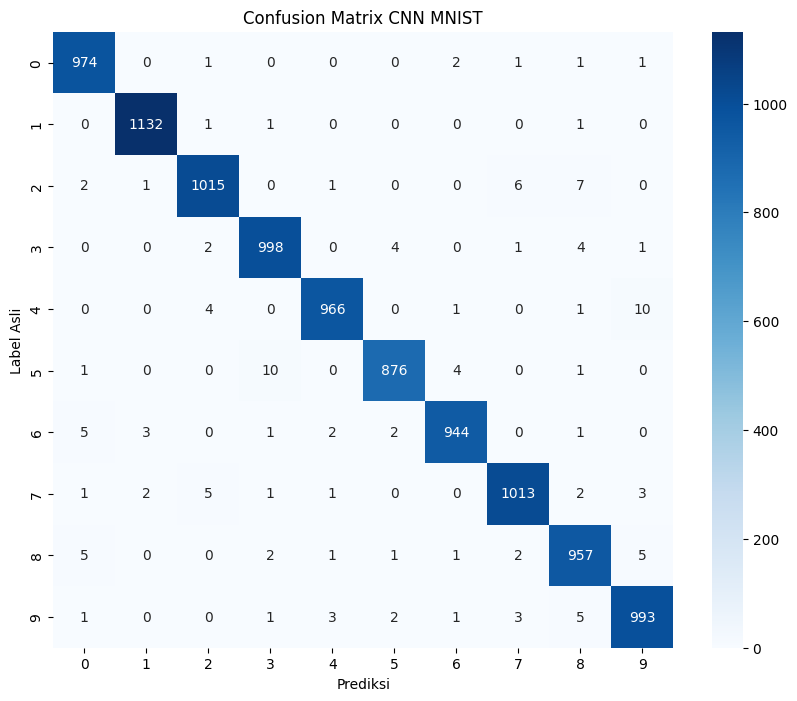

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Normalisasi dan reshape dengan tipe float32
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Baru prediksi
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Prediksi semua data test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualisasi
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Label Asli')
plt.title('Confusion Matrix CNN MNIST')
plt.show()

